# Numerical Integration 

Numerical integration is a critical concept in the field of computational mathematics, providing the ability to approximate definite integrals with a high degree of precision. 

$$
I[f] = \int_a^b f(x) \, dx
$$

In this notebook, we will delve into two methods of numerical integration: Simpson's Rule and Adaptive Quadrature.
Simpson's Rule is a straightforward method that uses quadratic polynomials to approximate the function over the interval of integration.
In contrast, Adaptive Quadrature is a more advanced technique that adaptively adjusts the step size based on the behavior of the function.


## Simpson's Rule 

Simpson's Rule is a simple but powerful method for numerical integration. It works by approximating the integrand with a quadratic polynomial, specifically derived from Lagrange interpolation with three points
at the endpoints and the midpoint of the interval.

$$
\begin{align*}
\int_{a}^{b} f(x) \, dx &\approx \frac{h}{3} \left[ f(a) + 4f\left(\frac{a+b}{2}\right) + f(b) \right] \\
&= \frac{h}{3} \left[ f(x_0) + 4f(x_1) + 2f(x_2) + \ldots + 2f(x_{n-2}) + 4f(x_{n-1}) + f(x_n) \right]
\end{align*}
$$

In the code provided, we start by defining the step size 'h', which is simply the interval length divided by the number of steps 'n'. The integral is then approximated by applying Simpson's Rule to each subinterval: the sum of the function evaluated at the endpoints and 4 times the function evaluated at the odd-indexed points, plus 2 times the function evaluated at the even-indexed points. This sum is multiplied by the step size 'h' and divided by 3 to give the final approximation of the integral.


## Adaptive Quadrature

Adaptive Quadrature method is an advanced technique in the numerical integration. Adaptive Quadrature dynamically adjusts the step size depending on the behavior of the function over the interval of integration.
The main concept behind Adaptive Quadrature is to divide the integration interval in such a way that areas where the function changes rapidly have smaller intervals (and hence more sample points) while areas where the function is relatively constant have larger intervals. This "adaptive" behavior ensures that the integration approximation is more accurate, especially for functions with sharp changes, high frequency oscillations, or other complex behaviors.

$$
\int_{a}^{b} f(x) \, dx \approx \text{adaptiveQuadrature}(f, a, b, \text{tol})
$$

In the provided code, we initially evaluate the function at the endpoints 'a' and 'b' and at the midpoint 'm'. We then estimate the integral using both Simpson's Rule and the trapezoid rule, and calculate the error as the absolute difference of these two estimates. If the error is within a specified tolerance, we use the Simpson's Rule estimate.We return the qSimpson because when the error between the Simpson's rule approximation and the trapezoid rule approximation is within the specified tolerance, it's generally a better choice to return the qSimpson value, as it is typically closer to the true integral value.

If not, we recursively apply the process to the two halves of the interval(right and left) also dividing the tol to 2, effectively doubling the number of subintervals. The division of the tolerance tol by 2 in the recursive calls is a strategy to ensure that the total error in the whole interval [a, b] remains under the original tolerance.


This recursive subdivision continues until the error is below the tolerance or the step size 'h' has become smaller than a specified minimum step size 'hmin'.
This approach offers a higher precision than Simpson's Rule alone, particularly for functions with complex behaviors such as rapid changes or oscillations.

## Comparison: Adaptive Quadrature vs Simpson's Rule

Having implemented both Simpson's Rule and Adaptive Quadrature, we can now compare the performance of these two methods. It's important to note that each of these methods has its strengths and weaknesses, and the choice of method will depend on the specific function and requirements of the numerical integration task.

#### Comparing the Methods 

In this part of the notebook, we are going to compare the performance of the Simpson's Rule and Adaptive Quadrature methods using the three different functions over the different intervals. 
First, we define the function and the interval. Then, we iterate over a list of different tolerances. For each tolerance, we perform the adaptive method and the Simpson's method. The number of intervals 'n' for the Simpson's method is determined by the number of evaluation points from the adaptive method minus one (to exclude the endpoints of the interval).

#### Analyzing Errors

We calculate the absolute errors of both methods, comparing the calculated integral value to the exact value . The smaller the error, the higher the accuracy of the method. By varying the tolerance, we can observe the impact on the accuracy of the numerical integration methods.

#### Visualization

For a visual comparison of the methods, we plot the function f(x), the evaluation points, and the vertical lines at the evaluation points for each method in separate subplots.

### 1.Function to test

$$
 \int_0^1 \sqrt{x}  \, dx
$$ 

The adaptive method's evaluation points are not evenly distributed across the interval, instead, they are concentrated more in regions where the function changes rapidly. This is visible in the plot where the distance between the vertical lines varies.
In contrast, the Simpson's method uses an equal number of evenly distributed evaluation points. The vertical lines are equally spaced in the plot.
By inspecting these plots, one can visually comprehend the difference between the adaptive method, which adjusts to the behavior of the function, and the Simpson's method, which uses a fixed step size.

- For this given function Simpson's Method is more efficient way to calculate the integral of given function.
We can see this after calculating the errors . For bigger tolarence values the difference between these two methods isn't really obvious.But for toletance value such as 0.01 , we can see the difference.

Tolerance: 1, Error (adaptive): 0.028598812542301677,               Error (Simpson): 0.028598812542301566


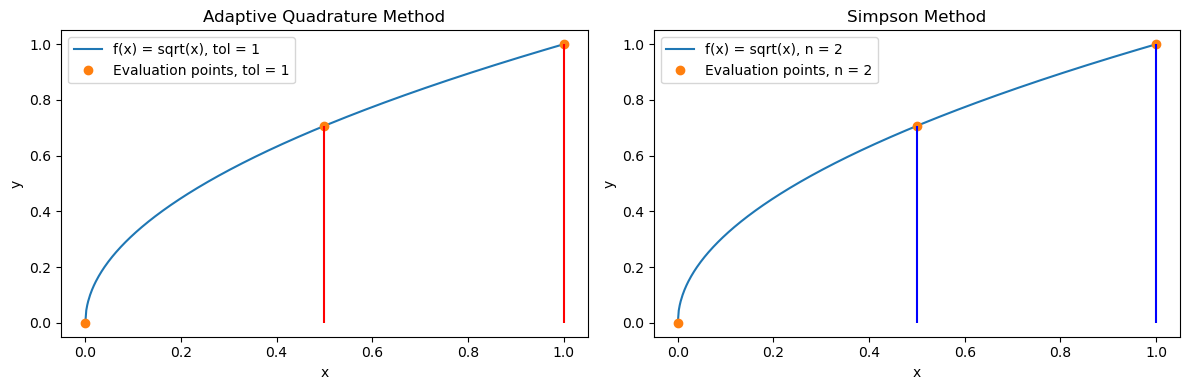

Tolerance: 0.1, Error (adaptive): 0.010143735207429283,               Error (Simpson): 0.010143735207429172


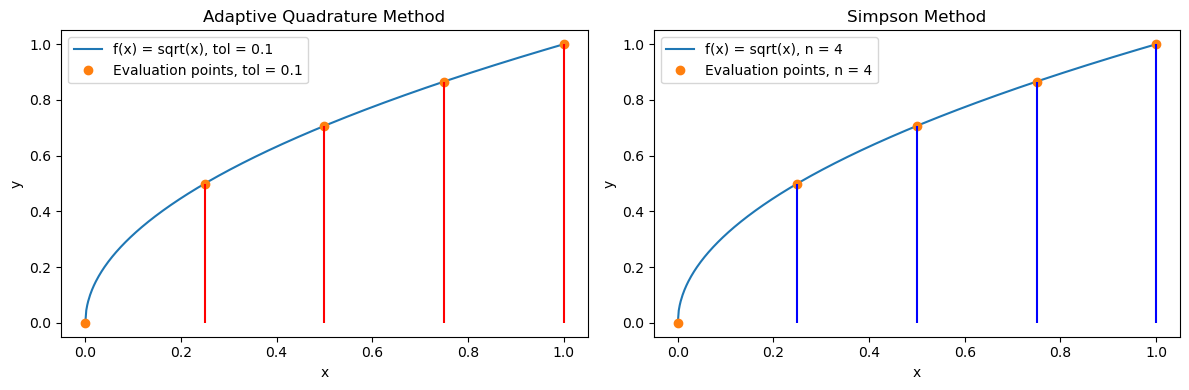

Tolerance: 0.01, Error (adaptive): 5.728810350780211e-05,               Error (Simpson): 0.0010663912522621555


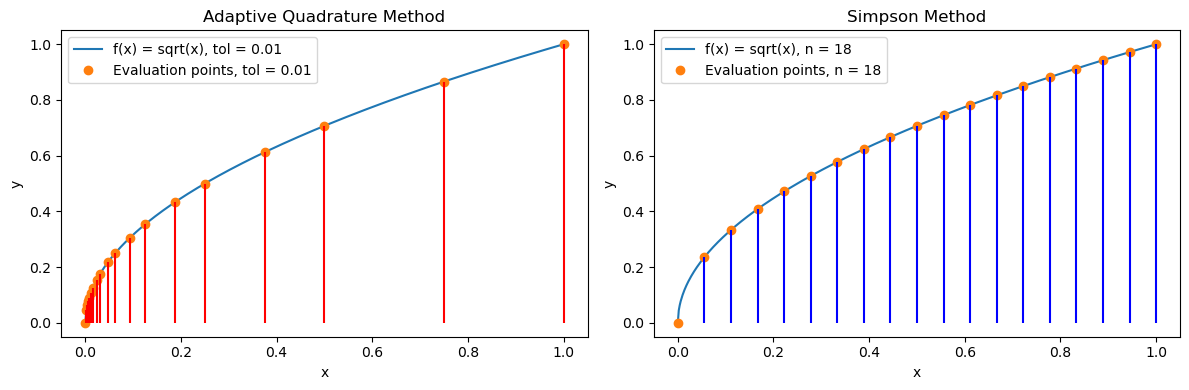

Tolerance: 0.001, Error (adaptive): 3.794687179481393e-06,               Error (Simpson): 0.00019706082310255724


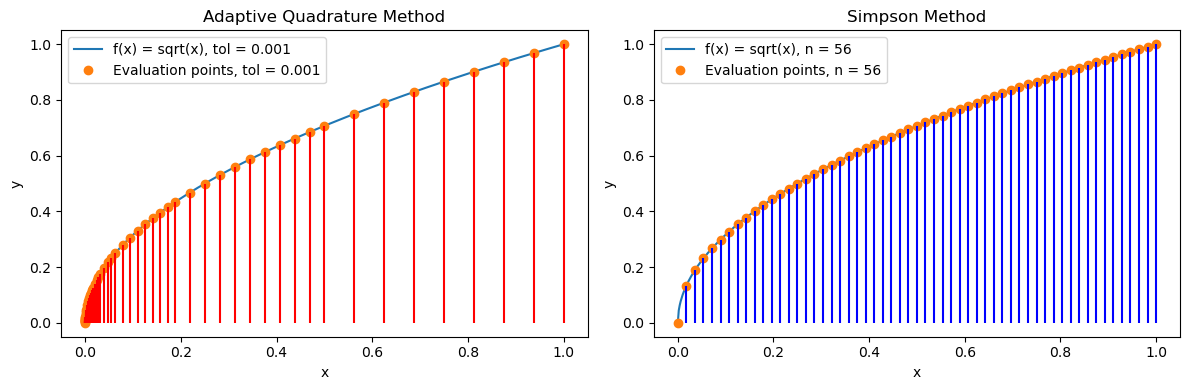

In [5]:
#import necessary libraries 
import matplotlib.pyplot as plt
import numpy as np
from quadrature import *

# Define the function and the interval
def f(x):
    return np.sqrt(x)

a = 0
b = 1

# Perform the adaptive method for various tolerances
tolerances = [1, 1.e-1, 1.e-2, 1.e-3]
# ... < 1.e-3 ('Die minimale Schrittweite wurde unterschritten.'/The minimum step size has been undercut.)

for tol in tolerances:
    nodes, integral_adapt = quadAdaptiv(f, a, b, tol=tol)
    
    # Sort the nodes and convert them to an ndarray
    nodes = np.array(sorted(nodes))
    
    # Calculate the number of intervals needed for the equidistant Simpson method
    # number of intervals(n), obtained from quadAdaptiv(number of evaluation points)
    #Subtract 1 from len(nodes),to exclude endpoints a and b from the count, resulting in the number of intervals.

    n = len(nodes) - 1

    # Calculate the integral with the equidistant Simpson method
    integral_simp = quadSimpson(f, a, b, n)

    # Calculate errors
    # 0.66667 = exact value of the function f(x) = sqrt(x)
    #The smaller the absolute errors, the closer the computed-
    #integrals are to the exact value, indicating higher accuracy.
    
    error_adapt = np.abs(0.66667 - integral_adapt)
    error_simp = np.abs(0.66667 - integral_simp)

    print( f"Tolerance: {tol}, Error (adaptive): {error_adapt},               Error (Simpson): {error_simp}")
    
    # Define x range for the plot
    x = np.linspace(a, b, 500)
    y = f(x)

    # Create a figure and two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

    # Mark the evaluation points and plot on the first subplot
    y_nodes = f(nodes)
    ax1.plot(x, y, label=f"f(x) = sqrt(x), tol = {tol}")
    ax1.plot(nodes, y_nodes, 'o', label=f"Evaluation points, tol = {tol}")
    ax1.vlines(nodes, 0, y_nodes, colors='r', linestyles='solid')
    ax1.legend()
    ax1.set_title("Adaptive Quadrature Method")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    
    # Perform the Simpson method and plot on the second subplot
    nodes_simpson = np.linspace(a, b, n+1)
    y_nodes_simpson = f(nodes_simpson)
    ax2.plot(x, y, label=f"f(x) = sqrt(x), n = {n}")
    ax2.plot(nodes_simpson, y_nodes_simpson, 'o', label=f"Evaluation points, n = {n}")
    ax2.vlines(nodes_simpson, 0, y_nodes_simpson, colors='b', linestyles='solid')
    ax2.legend()
    ax2.set_title("Simpson Method")
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")

    plt.tight_layout()
    plt.show()


### 2.Function to test

$$
\int_{1 \times 10^{-4}}^{1} \frac{1}{\sqrt{x}} \, dx
$$

- For this given function, Adaptive Quadrature performs better because this functions has more extreme points then the first function, therefore then adapthing the size of the interval here is advantageous.

Tolerance: 10, Error (adaptive): 0.0010627719787463796,               Error (Simpson): 1.0543494964786384


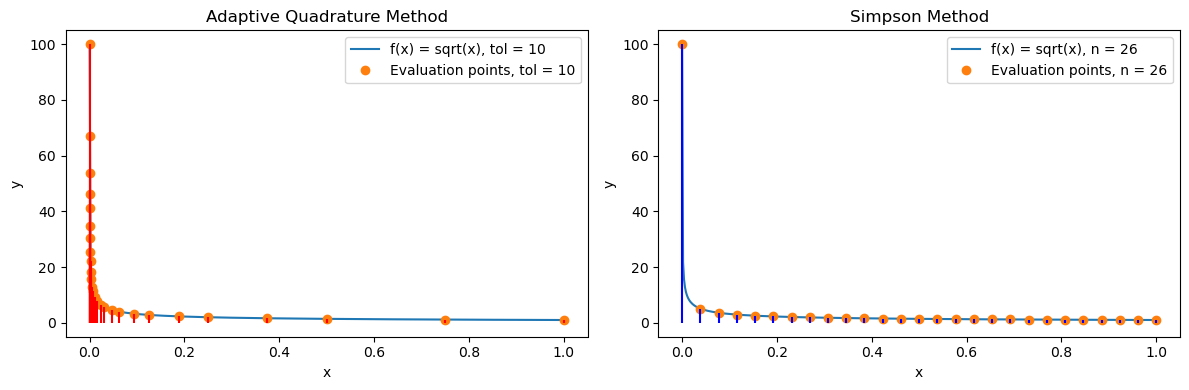

Tolerance: 1, Error (adaptive): 0.000981146202877703,               Error (Simpson): 0.8382510001531562


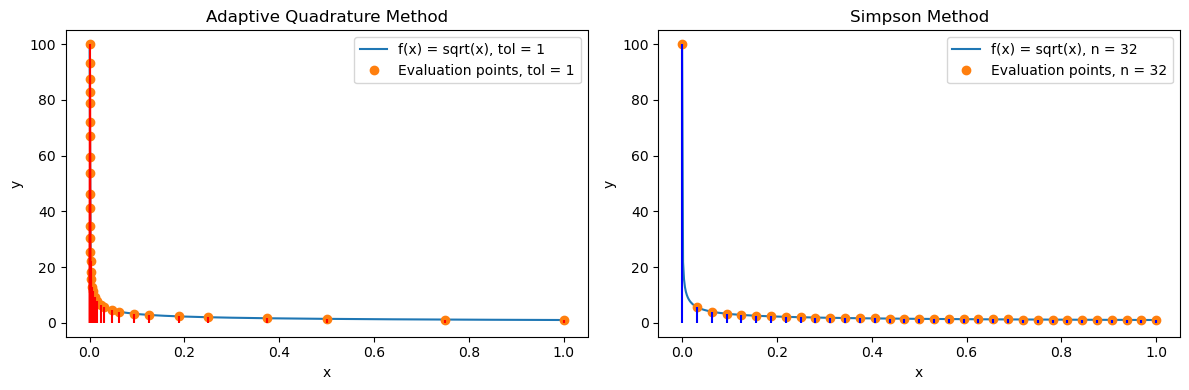

Tolerance: 0.1, Error (adaptive): 0.0007735614657149448,               Error (Simpson): 0.28617398181039055


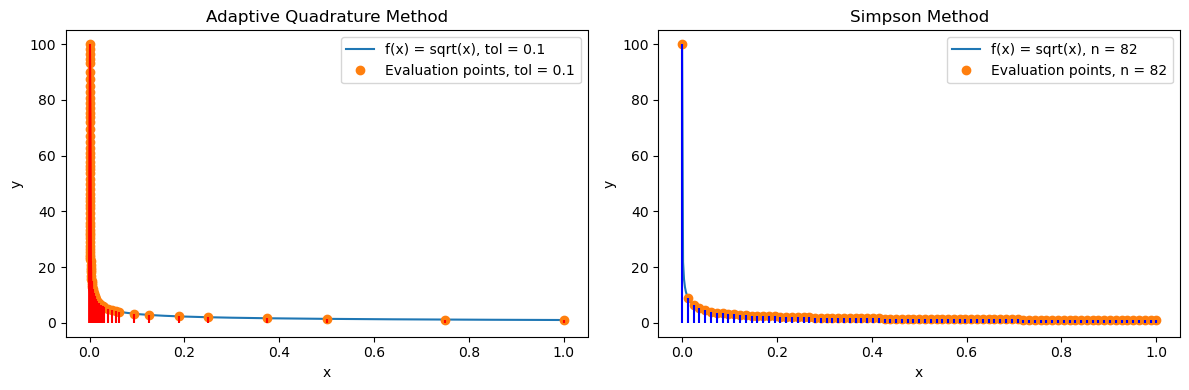

Tolerance: 0.01, Error (adaptive): 1.0653430021489996e-05,               Error (Simpson): 0.06854725475418677


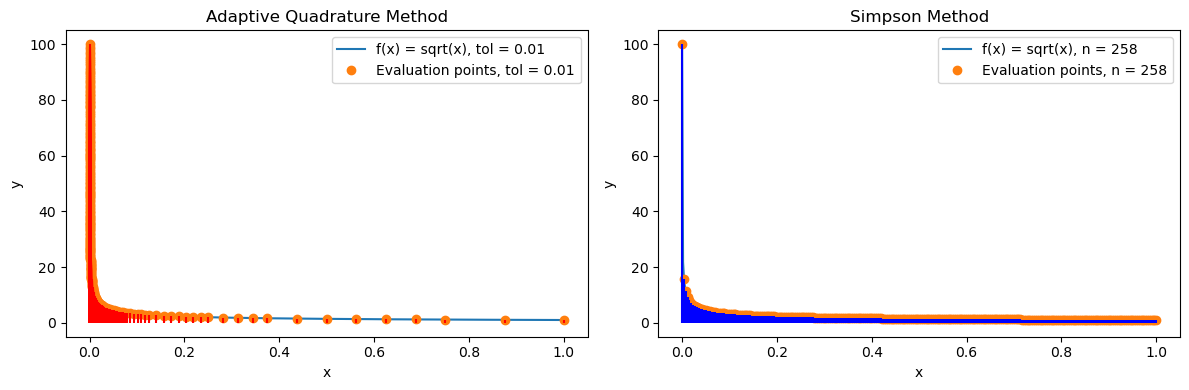

In [4]:
# Define the function and the interval

def f(x):
    return (1/np.sqrt(x))

a = 1.e-4
b = 1

# Perform the adaptive method for various tolerances
tolerances = [10,1,1.e-1,1.e-2]


for tol in tolerances:
    nodes, integral_adapt = quadAdaptiv(f, a, b, tol=tol)
    
    # Sort the nodes and convert them to an ndarray
    nodes = np.array(sorted(nodes))
    
    # Calculate the number of intervals needed for the equidistant Simpson method
    n = len(nodes) - 1

    # Calculate the integral with the equidistant Simpson method
    integral_simp = quadSimpson(f, a, b, n)

    # Compare the two methods
    # exact value for f(x)=1/np.sqrt(x) = 2*np.sqrt(1.e-4)
    
    #error_adapt = np.abs(1.98 - integral_adapt)
    #error_simp = np.abs(1.98 - integral_simp)
    error_adapt = np.abs (1.98 - integral_adapt)
    error_simp = np.abs(1.98 - integral_simp)


    print( f"Tolerance: {tol}, Error (adaptive): {error_adapt},               Error (Simpson): {error_simp}")
    
    # Create a plot of the function
    x = np.linspace(a, b, 500)
    y = f(x)
    # Create a figure and two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

    # Mark the evaluation points and plot on the first subplot
    y_nodes = f(nodes)
    ax1.plot(x, y, label=f"f(x) = sqrt(x), tol = {tol}")
    ax1.plot(nodes, y_nodes, 'o', label=f"Evaluation points, tol = {tol}")
    ax1.vlines(nodes, 0, y_nodes, colors='r', linestyles='solid')
    ax1.legend()
    ax1.set_title("Adaptive Quadrature Method")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    
    # Perform the Simpson method and plot on the second subplot
    nodes_simpson = np.linspace(a, b, n+1)
    y_nodes_simpson = f(nodes_simpson)
    ax2.plot(x, y, label=f"f(x) = sqrt(x), n = {n}")
    ax2.plot(nodes_simpson, y_nodes_simpson, 'o', label=f"Evaluation points, n = {n}")
    ax2.vlines(nodes_simpson, 0, y_nodes_simpson, colors='b', linestyles='solid')
    ax2.legend()
    ax2.set_title("Simpson Method")
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")

    plt.tight_layout()
    plt.show()


### 3.Function to test

$$
\int_{0}^{1} \frac{1}{{1 + 25x^2}} \, dx
$$

- In this given function we can see that both methods perform almost the same. The reason of this because given function is simple. It has no extrem points or high oscilating behaviour. This results, not allowing the implemanted methods to show case their diffrent feautures while approximating the integral of the given function.    

Tolerance: 0.1, Error (adaptive): 0.001157418317893344,               Error (Simpson): 0.004499859262751538


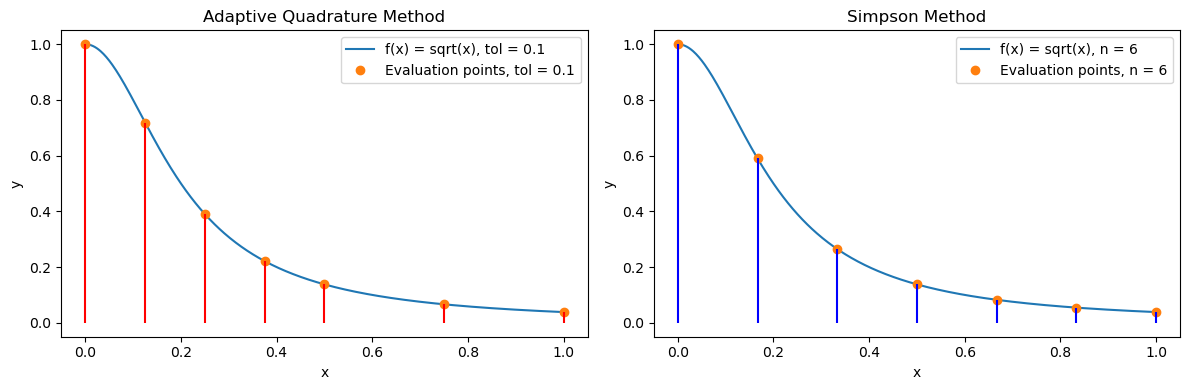

Tolerance: 0.01, Error (adaptive): 1.5119756093362469e-05,               Error (Simpson): 6.04142437465871e-07


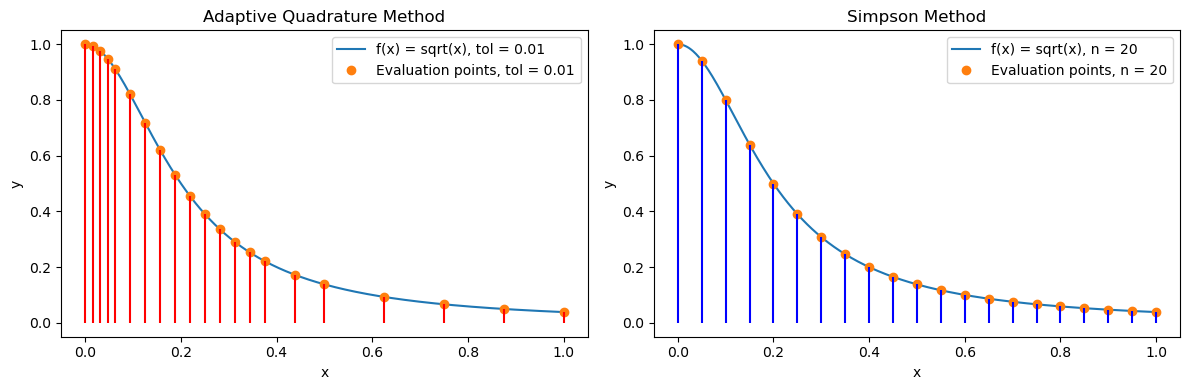

Tolerance: 0.001, Error (adaptive): 2.772135480610949e-07,               Error (Simpson): 1.5279108028787292e-07


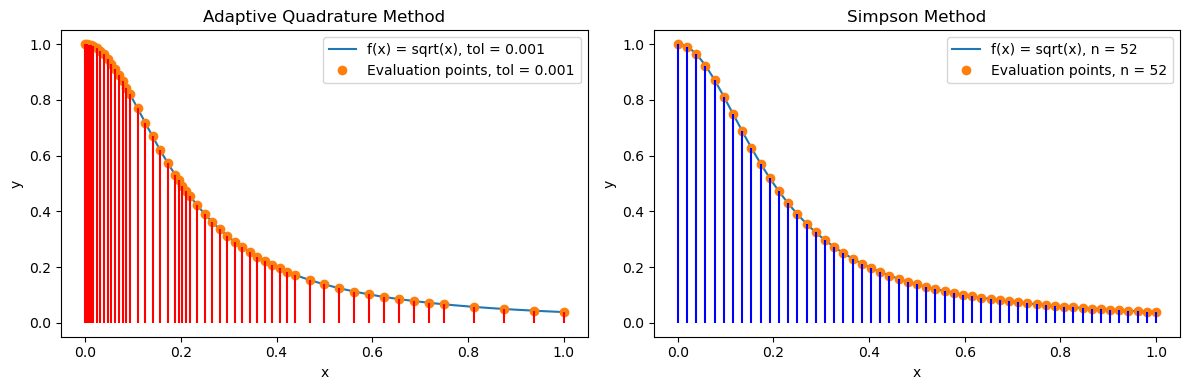

Tolerance: 0.0001, Error (adaptive): 1.5628216976093512e-07,               Error (Simpson): 1.5338350944915646e-07


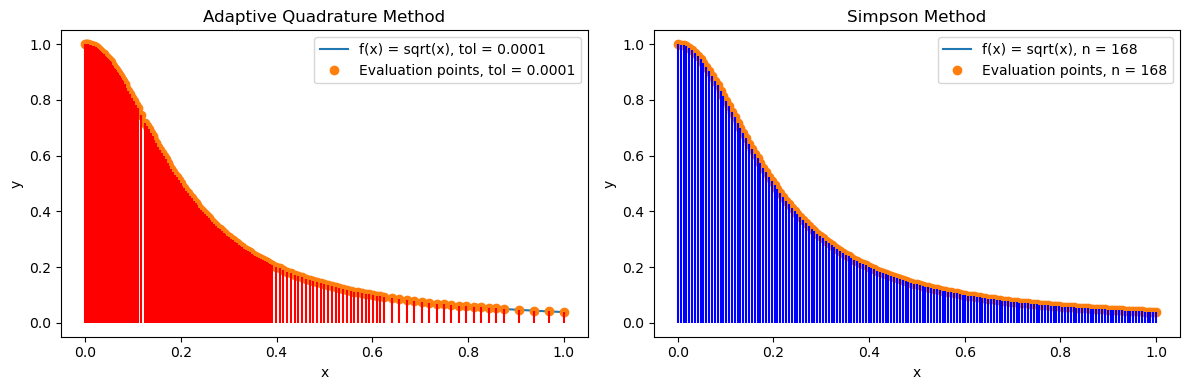

In [6]:
# Define the function and the interval
def f(x):
    return 1 / (1 + 25 * x**2)


a = 0
b = 1

# Perform the adaptive method for various tolerances
tolerances = [1.e-1, 1.e-2,1.e-3,1.e-4]
 
for tol in tolerances:
    nodes, integral_adapt = quadAdaptiv(f, a, b, tol=tol)
    
    # Sort the nodes and convert them to an ndarray
    nodes = np.array(sorted(nodes))
    
    # Calculate the number of intervals needed for the equidistant Simpson method
    # number of intervals(n), obtained from quadAdaptiv(number of evaluation points)
    #Subtract 1 from len(nodes),to exclude endpoints a and b from the count, resulting in the number of intervals.

    n = len(nodes) - 1

    # Calculate the integral with the equidistant Simpson method
    integral_simp = quadSimpson(f, a, b, n)

    # Calculate errors
    # 0.27468 = exact value of the function f(x) = 1 /(1 + 25*x**2)
    #The smaller the absolute errors, the closer the computed
    #integrals are to the exact value, indicating higher accuracy.
    
    error_adapt = np.abs(0.27468 - integral_adapt)
    error_simp = np.abs(0.27468 - integral_simp)
    
    print( f"Tolerance: {tol}, Error (adaptive): {error_adapt},               Error (Simpson): {error_simp}")
    
    # Define x range for the plot
    x = np.linspace(a, b, 500)
    y = f(x)

    # Create a figure and two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

    # Mark the evaluation points and plot on the first subplot
    y_nodes = f(nodes)
    ax1.plot(x, y, label=f"f(x) = sqrt(x), tol = {tol}")
    ax1.plot(nodes, y_nodes, 'o', label=f"Evaluation points, tol = {tol}")
    ax1.vlines(nodes, 0, y_nodes, colors='r', linestyles='solid')
    ax1.legend()
    ax1.set_title("Adaptive Quadrature Method")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    
    # Perform the Simpson method and plot on the second subplot
    nodes_simpson = np.linspace(a, b, n+1)
    y_nodes_simpson = f(nodes_simpson)
    ax2.plot(x, y, label=f"f(x) = sqrt(x), n = {n}")
    ax2.plot(nodes_simpson, y_nodes_simpson, 'o', label=f"Evaluation points, n = {n}")
    ax2.vlines(nodes_simpson, 0, y_nodes_simpson, colors='b', linestyles='solid')
    ax2.legend()
    ax2.set_title("Simpson Method")
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")

    plt.tight_layout()
    plt.show()


### Conclusion

In conclusion, numerical integration is an indispensable tool in scientific computation, providing the ability to accurately approximate definite integrals, especially when analytical solutions are difficult or impossible to obtain. Both Simpson's Rule and Adaptive Quadrature offer effective strategies for performing numerical integration, each with its own advantages and specific use cases.

In [7]:
from scipy.integrate import quad

def integrand(x):
    return 1 / (1 + 25 * x**2)

result, error = quad(integrand, 0, 1)
print(result)


0.2746801533890033


In [8]:
def integrand(x):
    return (1/np.sqrt(x))

result, error = quad(integrand, 1.e-4 , 1)
print(result)


1.9800000000000002


In [9]:
def integrand(x):
    return np.sqrt(x)

result, error = quad(integrand, 0 , 1)
print(result)


0.6666666666666669
